## Libraries and Packages

In [2]:
# Python 3 environment 
import os

# Machine Learning Classifiers
from lightgbm import LGBMRegressor, Booster, cv as lgbcv, Dataset as lgbDs
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# Unsupervised Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation Tools
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
 # for K-fold cross validation
import time
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Processing and Visualization Libraries
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from matplotlib.colors import ListedColormap
import graphviz
import zipfile
import random

import warnings
warnings.filterwarnings('ignore')

# New tools
import gzip
import m2cgen as m2c
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.interpolate import make_interp_spline, BSpline

In [3]:
# Allow Jupyter Notebook to display all output in the cell not just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Max rows/columns to display

In [4]:
pd.options.display.max_rows = 200
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

In [5]:
# Unzip gdata
file1 = gzip.open('D:\Insight DS\Airbnb\April\listings.csv.gz', 'rb')
file2 = gzip.open('D:\Insight DS\Airbnb\May\listings.csv.gz', 'rb')
file3 = gzip.open('D:\Insight DS\Airbnb\June\listings.csv.gz', 'rb')
file4 = gzip.open('D:\Insight DS\Airbnb\July\listings.csv.gz', 'rb')

l_df1 =pd.read_csv(file1)
l_df2 =pd.read_csv(file2)
l_df3 =pd.read_csv(file3)
l_df4 =pd.read_csv(file4)

In [6]:
l_df = pd.concat([l_df1, l_df2, l_df3, l_df4], ignore_index=True)

file1.close()
file2.close()
file3.close()
file4.close()

In [7]:
# Be careful with the data type 
l_df['price'].dtype
# l_df['price'].max()
l_df['price'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float).max()

dtype('O')

10000.0

In [8]:
# from pivottablejs import pivot_ui # a bit messy still
# pivot_ui(l_df)

In [9]:
# sns.distplot(l_df['price'].replace( '[\$,)]','', regex=True )
#                .replace( '[(]','-',   regex=True ).astype(float), kde=False)

In [10]:
# sns.distplot(l_df['review_scores_rating'].dropna())

In [11]:
# sns.distplot(l_df['review_scores_cleanliness'].dropna())

In [12]:
# fig, axs = plt.subplots(figsize=(6,4))
# axs.scatter(l_df['review_scores_rating'], l_df['price'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))
# # axs.set_yticks(axs.get_yticks()[::10]) use this when tick labels overlap
# axs.set_ylim([0, 5000])
# plt.show()

In [13]:
# # Select DataFrame Rows Based on multiple conditions on columns
# l_df1 = l_df[['review_scores_rating', 'review_scores_cleanliness', 'review_scores_', 'price'
#               ]][(l_df['review_scores_cleanliness'].notna())
#                  & (l_df['review_scores_rating'].notna()) &
#                  (l_df['price'].replace('[\$,)]', '', regex=True).replace(
#                      '[(]', '-', regex=True).astype(float) < 300)]
# l_df1['price'] = l_df['price'].replace('[\$,)]', '', regex=True).replace(
#     '[(]', '-', regex=True).astype(float)
# l_df1

In [14]:
# F1 = 'bathrooms'
# F2 = 'bedrooms'
# F3 = 'beds'
# F4 = 'minimum_nights'
# F5 = 'maximum_nights'
# F6 = 'availability_30'
# F7 = 'availability_60'
# F8 = 'instant_bookable'

# l_df1 = l_df[[F1, F2, F3, F4, F5, F6, F7, F8, 'price', 'reviews_per_month'
#               ]][(l_df[F1].notna())
#                  & (l_df[F2].notna())
#                  & (l_df[F3].notna())
#                  & (l_df[F4].notna())
#                  & (l_df[F5].notna())
#                  & (l_df[F6].notna())
#                  & (l_df[F7].notna())
#                  & (l_df[F8].notna())
#                  & (l_df['price'].replace('[\$,)]', '', regex=True).replace(
#                      '[(]', '-', regex=True).astype(float) < 300)
#                  & (l_df['reviews_per_month'].notna())]
# l_df1['price'] = l_df['price'].replace('[\$,)]', '', regex=True).replace(
#     '[(]', '-', regex=True).astype(float)
# l_df1.describe()

In [15]:
price_lo_bound = 20
price_hi_bound = 500

l_df1 = l_df
l_df1[[
    'price', 'weekly_price', 'monthly_price', 'security_deposit',
    'cleaning_fee', 'extra_people'
]] = l_df[[
    'price', 'weekly_price', 'monthly_price', 'security_deposit',
    'cleaning_fee', 'extra_people'
]].replace('[\$,)]', '', regex=True).replace('[(]', '-',
                                             regex=True).astype(float)
l_df1['host_response_rate'] = l_df['host_response_rate'].replace(
    '[,\%)]', '', regex=True).replace('[(]', '-', regex=True).astype(float)
df_new = l_df1
df_new = df_new[
    (df_new['price'] >= price_lo_bound)
    & (df_new['price'] <= price_hi_bound)].drop(
        [
            'scrape_id',
            'listing_url',
            'thumbnail_url',
            'medium_url',
            'xl_picture_url',
            'last_scraped',
            'name',
            'host_id',
            'summary',
            'space',
            'description',
            'neighborhood_overview',
            'notes',
            'transit',
            'access',
            'interaction',
            'picture_url',
            'experiences_offered',
            'house_rules',
            'host_url',
            'host_name',
            'host_since',
            'host_location',
            'host_about',
            'neighborhood_overview',
            'host_thumbnail_url',
            'host_picture_url',
            'host_verifications',
            'host_acceptance_rate',
            'host_listings_count',
            'host_total_listings_count',
            'neighbourhood_group_cleansed',
            'amenities',
            'calendar_last_scraped',
            # these might need to be considered
            'first_review',
            'last_review',
            'number_of_reviews',
            'number_of_reviews_ltm',
            'review_scores_rating',
            #
            'license',
            'jurisdiction_names',
            #
            'latitude',
            'longitude',
            'host_neighbourhood',
            'calendar_updated',
            #                         'neighbourhood_cleansed',  # not sure
            'zipcode',
            'calculated_host_listings_count',
            'review_scores_value',
            'review_scores_cleanliness',
            'review_scores_location',
            'review_scores_accuracy',
            'review_scores_communication',
            'maximum_minimum_nights',
            'minimum_minimum_nights',
            'maximum_maximum_nights',
            'minimum_maximum_nights',
            'country',
            'host_response_rate',
            'host_is_superhost',
            'host_identity_verified',
            'street',
            'neighbourhood',
            'city',
            'state',
            'market',
            'smart_location',
            'country_code',
            'square_feet',
            'minimum_nights_avg_ntm',
            'maximum_nights_avg_ntm',
            'has_availability',
            'availability_30',
            'availability_60',
            'availability_90',
            'availability_365',
            'review_scores_checkin',
            'requires_license',
            'is_business_travel_ready',
            'calculated_host_listings_count_entire_homes',
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms',
            'host_has_profile_pic',
            'require_guest_profile_picture',
            'require_guest_phone_verification',
            'is_location_exact',
            'bed_type',
            'beds',
            'bedrooms',
            'bathrooms',
            'cancellation_policy',
            'instant_bookable',
            'property_type',
            'room_type',
            'guests_included',
            'host_response_time'
        ],
        axis=1)  #.sort_values(by=['price'])

In [16]:
df_new = df_new[df_new['reviews_per_month'].notna()]
# df_new['host_response_time'] = df_new['host_response_time'].fillna('NA')
# df_new['bathrooms'] = df_new['bathrooms'].fillna(df_new['bathrooms'].value_counts().index[0])
# df_new['bedrooms'] = df_new['bedrooms'].fillna(df_new['bedrooms'].value_counts().index[0])
# df_new['beds'] = df_new['beds'].fillna(df_new['beds'].value_counts().index[0])
df_new['weekly_price'] = df_new['weekly_price'].fillna(df_new['price']*7)
df_new['monthly_price'] = df_new['monthly_price'].fillna(df_new['price']*30)
df_new['security_deposit'] = df_new['security_deposit'].fillna(df_new['price']*2.75)
df_new['cleaning_fee'] = df_new['cleaning_fee'].fillna(df_new['price']*0.67)
df_new = df_new[df_new['minimum_nights'] <= 365]

In [17]:
def occupancy_rate_est(data, alos, rr, coor):
    # alos: average length of stay
    # rr: review rate
    # coor: cap of occupancy rate

    data.loc[(data['minimum_nights'] <= alos) &
             (data['maximum_nights'] >= alos
              ), 'occupancy_%'] = data['reviews_per_month'] * alos / rr / 30

    data.loc[(data['maximum_nights'] <= alos), 'occupancy_%'] = data[
        'reviews_per_month'] * data['maximum_nights'] / rr / 30

    data.loc[(data['minimum_nights'] >= alos), 'occupancy_%'] = data[
        'reviews_per_month'] * data['minimum_nights'] / rr / 30

    data['occupancy_%'] = data['occupancy_%'].where(
        data['occupancy_%'] <= coor, coor)

    return data.head(10)

In [18]:
occupancy_rate_est(df_new, 5.5, 0.72, 1)

,id,neighbourhood_cleansed,accommodates,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,reviews_per_month,occupancy_%
0,958,Western Addition,3,170.0,1120.0,4200.0,100.00,100.0,25.0,1,30,1.55,0.394676
1,5858,Bernal Heights,5,235.0,1600.0,5500.0,646.25,100.0,0.0,30,60,0.92,1.000000
2,7918,Haight Ashbury,2,65.0,485.0,1685.0,200.00,50.0,12.0,32,60,0.15,0.222222
3,8142,Haight Ashbury,2,65.0,490.0,1685.0,200.00,50.0,12.0,32,90,0.14,0.207407
5,8567,Western Addition,6,255.0,1785.0,7650.0,0.00,125.0,0.0,2,365,0.27,0.068750
6,8739,Mission,3,139.0,973.0,9999.0,0.00,50.0,60.0,1,14,5.57,1.000000
7,9225,Potrero Hill,2,135.0,1000.0,4000.0,371.25,50.0,0.0,1,365,3.98,1.000000
8,10251,Mission,6,265.0,1540.0,5400.0,500.00,100.0,45.0,3,30,2.80,0.712963
9,10820,Haight Ashbury,3,177.0,1239.0,5310.0,2500.00,208.0,0.0,30,1125,0.32,0.444444
10,10824,Western Addition,5,194.0,1358.0,5820.0,3000.00,208.0,0.0,30,1125,0.16,0.222222


In [19]:
df_new['revenue'] = df_new['price']*df_new['occupancy_%']

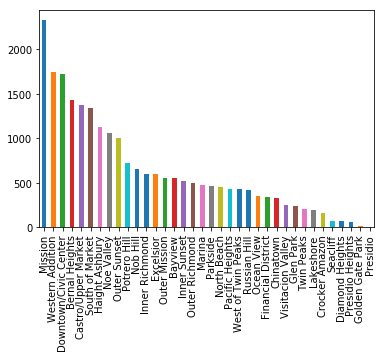

In [20]:
df_new['neighbourhood_cleansed'].value_counts().plot.bar()

In [21]:
class MultiColumnLabelEncoder(LabelEncoder):
    """
    Wraps sklearn LabelEncoder functionality for use on multiple columns of a
    pandas dataframe.

    """
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, dframe):
        """
        Fit label encoder to pandas columns.

        Access individual column classes via indexig `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            for idx, column in enumerate(self.columns):
                # fit LabelEncoder to get `classes_` for the column
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                # append this column's encoder
                self.all_encoders_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                self.all_encoders_[idx] = le
        return self

    def fit_transform(self, dframe):
        """
        Fit label encoder and return encoded labels.

        Access individual column classes via indexing
        `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`

        Access individual column encoded labels via indexing
        `self.all_labels_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            self.all_labels_ = np.ndarray(shape=self.columns.shape,
                                          dtype=object)
            for idx, column in enumerate(self.columns):
                # instantiate LabelEncoder
                le = LabelEncoder()
                # fit and transform labels in the column
                dframe.loc[:, column] =\
                    le.fit_transform(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                self.all_encoders_[idx] = le
                self.all_labels_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                dframe.loc[:, column] = le.fit_transform(
                    dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                self.all_encoders_[idx] = le
        return dframe

    def transform(self, dframe):
        """
        Transform labels to normalized encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx].transform(
                    dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .transform(dframe.loc[:, column].values)
        return dframe.loc[:, self.columns].values

    def inverse_transform(self, dframe):
        """
        Transform labels back to original encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        return dframe

In [22]:
# find object columns
object_columns = df_new.iloc[:, :].select_dtypes(include=['object']).columns

# Multi-column label encoding
mcle = MultiColumnLabelEncoder(columns = object_columns)
df_go = mcle.fit_transform(df_new)

In [23]:
### Split Data
# Randomly split dataframe into train and test with a certain ratio
msk = np.random.rand(len(df_go)) < 0.8

train = df_go[msk]
train1 = train.copy()
train1['price'] = train1['price'] * 2
train1['occupancy_%'] = train1['occupancy_%'] * 0
train1['revenue'] = train1['price'] * train1['occupancy_%']
train2 = train.copy()
train2['price'] = train1['price'] * 0
train2['occupancy_%'] = 1
train2['revenue'] = train2['price'] * train2['occupancy_%']
train = train.append(train1, ignore_index=True)
train = train.append(train2, ignore_index=True)

test = df_go[~msk]
test = test[test['price'] > 0]
test = test.drop_duplicates(subset='id', keep='first', inplace=False);

In [24]:
from sklearn.utils import shuffle
train = shuffle(train)
test = shuffle(test)

In [25]:
# Assign independent variables as x and the target variable as y
x_train = train.drop(['id', 'reviews_per_month','occupancy_%', 'revenue'], axis=1)
y_train = train['occupancy_%']
x_test = test.drop(['id', 'reviews_per_month','occupancy_%', 'revenue'], axis=1)
y_test = test['occupancy_%']

In [26]:
# ### Feature Scaling
# # Normalize the range of independent variables to ensure the variable weights are not influenced by the scale difference as well as to improve the convergence speed of algorithms
# min_max_scaler = MinMaxScaler()
# x_train = min_max_scaler.fit_transform(x_train)
# x_test = min_max_scaler.fit_transform(x_test)

### Machine Learning Setups and Evaluations
#### LightGBM

In [61]:
# Grid Search
lgb = LGBMRegressor()
n_estimators = [5,10,20,30,40,50,100,150,200,250,300,350,400,450,500]
max_depth = [3,5,10,15]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(lgb, param_grid, n_jobs=-1, scoring='r2', cv=5, verbose=1)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


Best: 0.918743 using {'max_depth': 15, 'n_estimators': 500}


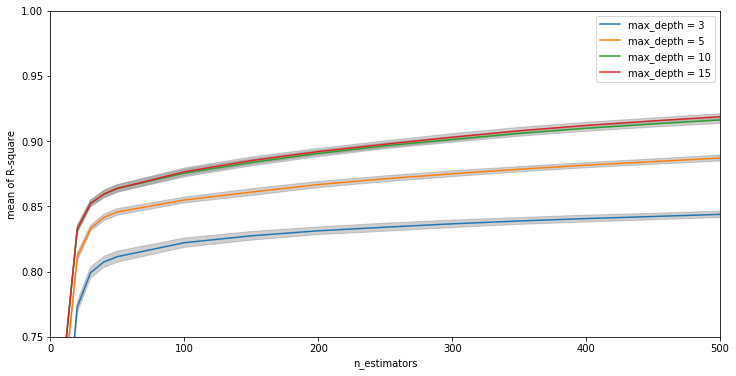

In [62]:
# Plot grid search results
plt.figure(figsize=(12,6));
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
stdevs = np.array(stds).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='max_depth = ' + str(value));
    plt.fill_between(n_estimators, scores[i]-stdevs[i], scores[i]+stdevs[i], color='#888888', alpha=0.4);
plt.xlim(0,500)
plt.ylim(0.75,1)
plt.legend()
plt.xlabel('n_estimators');
plt.ylabel('mean of R-square');
plt.savefig('n_estimators_vs_max_depth.png');


In [320]:
# Set general hyperparameters for all ML packages using the grid search result
max_depth = 12
n_estimator = 1200
random_state = 110

In [321]:
%%time
# start = time.time()
lgb = LGBMRegressor(max_depth=max_depth,
                    n_estimators=n_estimator,
                    random_state=random_state)
lgb.fit(x_train, y_train, categorical_feature=list(object_columns.values))
# code = m2c.export_to_python(lgb); # try next line first
lgb.booster_.save_model('lgb_regressor.txt')
# from sklearn.externals import joblib
# joblib.dump(lgb, 'lgb.pkl')
# acc_lgb = accuracy_score(y_test, lgb.predict(x_test))

y_pred_lgb = lgb.predict(x_test)

# fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb, drop_intermediate=False)
# auc_lgb = roc_auc_score(y_test, y_pred_lgb)
# end = time.time()
# time_lgb = end - start
# print("The entire evaluation takes", time_lgb, "s")

Wall time: 2.19 s


In [322]:
# #Cross Validation
# dftrainLGB = lgbDs(data = x_train, label = y_train, feature_name = list(x_train))

# params = {'objective': 'regression', 'max_depth': 30}
# cv_results = lgbcv(
#         params,
#         dftrainLGB,
#         num_boost_round=1100,
#         nfold=5,
#         metrics='rmse',
#         early_stopping_rounds=10,
#         categorical_feature=list(object_columns.values),

#         # This is what I added
#         stratified=False
#         )

In [323]:
# plt.plot(list(range(1,1101,1)), cv_results['rmse-mean'])

In [324]:
# ttt = Booster(model_file='lgb_regressor.txt')
# ttt.predict(x_test)
# gbm_pickle = joblib.load('lgb.pkl')

RMSE = 0.15575153386777196
R^2 = 0.811563617605614
RMSE = 29.834434782760052
R^2 = 0.8400460043239413
Wall time: 40.9 ms


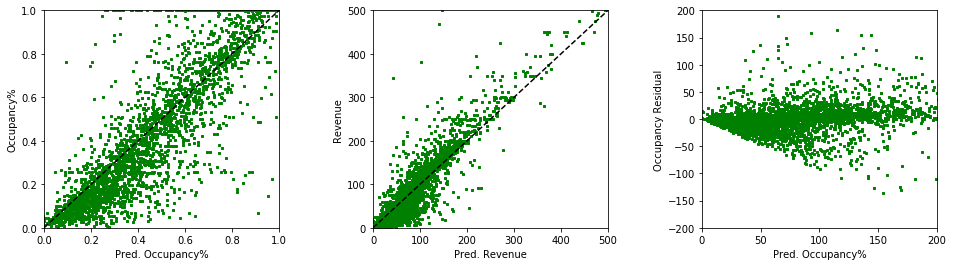

In [325]:
%%time
f, axs = plt.subplots(1, 3, figsize=(16,4))
f.subplots_adjust(wspace=0.4);

axs[0].plot(y_pred_lgb, y_test, 'gs', markersize=2)
axs[0].set(xlim=(0, 1), ylim=(0, 1), xlabel='Pred. Occupancy%', ylabel='Occupancy%')
axs[0].plot([0, 1000], [0, 1000], 'k--')

axs[1].plot(x_test['price']*y_pred_lgb, x_test['price']*y_test, 'gs', markersize=2)
axs[1].set(xlim=(0, 500), ylim=(0, 500), xlabel='Pred. Revenue', ylabel='Revenue')
axs[1].plot([0, 500], [0, 500], 'k--')

axs[2].plot(x_test['price']*y_pred_lgb, (x_test['price']*y_test - x_test['price']*y_pred_lgb), 'gs', markersize=2)
axs[2].set(xlim=(0, 200), ylim=(-200, 200), xlabel='Pred. Occupancy%', ylabel='Occupancy Residual')


print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print('R^2 =', r2_score(y_test, y_pred_lgb))
print('RMSE =', np.sqrt(mean_squared_error(x_test['price']*y_test, x_test['price']*y_pred_lgb)))
print('R^2 =',r2_score(x_test['price']*y_test, x_test['price']*y_pred_lgb))

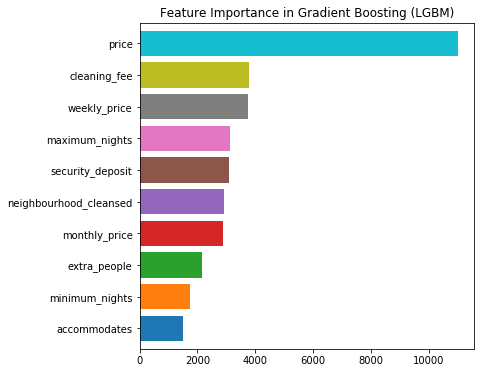

In [29]:
plt.figure(figsize=(6, 6));
pd.Series(lgb.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8);
plt.title('Feature Importance in Gradient Boosting (LGBM)');
plt.show();

In [30]:
## heatmap
# f,ax = plt.subplots(figsize=(8, 8))
# sns.set(font_scale=1.0)
# sns.heatmap(df_go.corr(), annot=True, linewidths=1, cmap = plt.cm.RdYlBu_r, vmin = -0.5, vmax = 0.8,fmt= '.1f')
# plt.title('Correlation Heatmap')
# plt.show()
# sns.reset_orig()

original price is $ 61.0
original monthly revenue is $ 711.6666666666667
model predicted monthly revenue is $ 701.2109976857514
optimal monthly revenue is $ 1049.144551559859
optimized price is $ 55


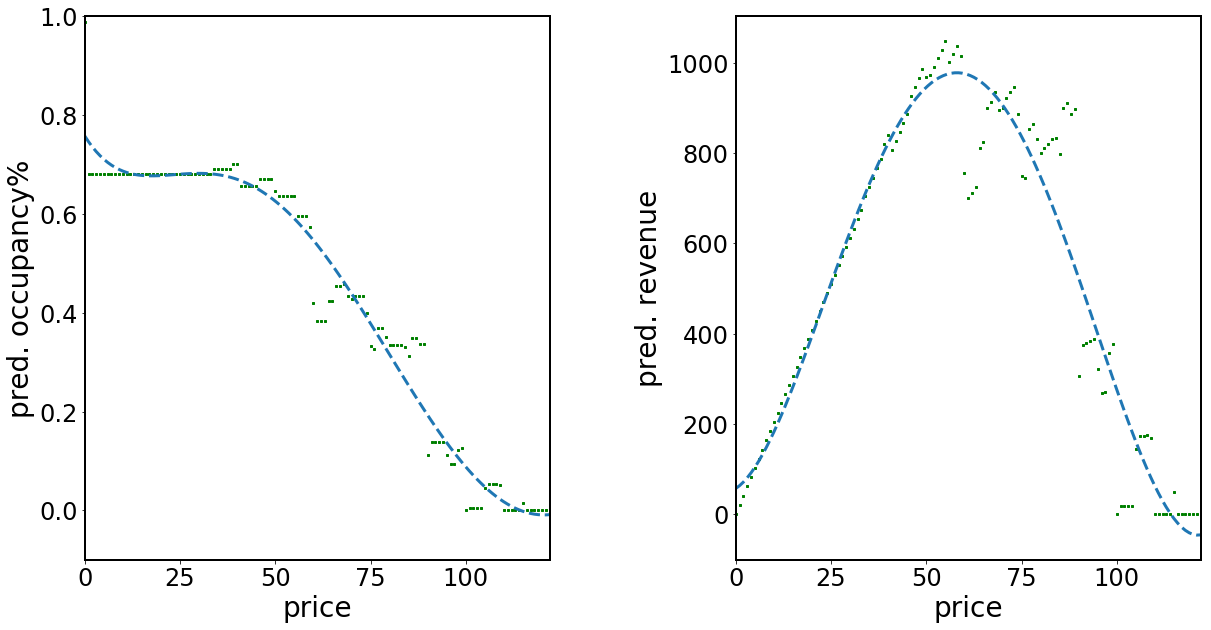

In [350]:
test_ID = 1111

max_price = int(x_test['price'].iloc[test_ID]*2)
price_range = range(0, max_price, 1)

x_in = pd.DataFrame(np.repeat(x_test.iloc[[test_ID]].values, max_price, axis=0))
x_in.columns = x_test.columns
x_in['price'] = pd.DataFrame(list(price_range)).iloc[:, 0]

pred_occupancy = lgb.predict(x_in)
pred_occupancy[pred_occupancy > 1] = 1 # ensure that occupancy% does not go above 100%
pred_occupancy[pred_occupancy < 0] = 0 # ensure that occupancy% does not go below 0%
pred_revenue = pred_occupancy*x_in['price']

# -------------------------------------------------------------
z_o = np.polyfit(price_range, pred_occupancy, 5)
p_o = np.poly1d(z_o)
xp_o = np.linspace(0, max_price, max_price)

z_r = np.polyfit(price_range, pred_revenue*30, 4)
p_r = np.poly1d(z_r)
xp_r = np.linspace(0, max_price, max_price)
# -------------------------------------------------------------
print('original price is $', x_test['price'].iloc[test_ID])
print('original monthly revenue is $', x_test['price'].iloc[test_ID]*y_test.iloc[test_ID]*30)
print('model predicted monthly revenue is $', x_test['price'].iloc[test_ID]*y_pred_lgb[test_ID]*30)
print('optimal monthly revenue is $', pred_revenue.max()*30)
print('optimized price is $', np.argmax(pred_revenue))

f,axs=plt.subplots(1,2, figsize=(20,10))

axs[0].plot(price_range, pred_occupancy, 'gs',  markersize = 2, label='predicted results');
axs[0].plot(xp_o,p_o(xp_o), linewidth=3, linestyle='--', label='polyfit')
axs[0].set(xlim = (0, max_price), ylim = (-0.1,1));
axs[0].set_xlabel('price', fontsize=28)
axs[0].set_ylabel('pred. occupancy%', fontsize=28)
axs[0].tick_params(axis="x", labelsize=24)
axs[0].tick_params(axis="y", labelsize=24)

axs[1].plot(price_range, pred_revenue*30, 'gs', markersize = 2);
axs[1].plot(xp_r,p_r(xp_r), linewidth=3, linestyle='--')
axs[1].set(xlim = (0, max_price), xlabel = 'price', ylabel = 'revenue');
axs[1].set_xlabel('price', fontsize=28)
axs[1].set_ylabel('pred. revenue', fontsize=28)
axs[1].tick_params(axis="x", labelsize=24)
axs[1].tick_params(axis="y", labelsize=24)

# adjust the border width
for axis in ['top','bottom','left','right']:
    axs[0].spines[axis].set_linewidth(2)
    axs[1].spines[axis].set_linewidth(2)

f.subplots_adjust(wspace=0.4);

In [32]:
x_test.iloc[497]

neighbourhood_cleansed    24.0  
accommodates              2.0   
price                     275.0 
weekly_price              1925.0
monthly_price             8250.0
security_deposit          500.0 
cleaning_fee              110.0 
extra_people              0.0   
minimum_nights            2.0   
maximum_nights            1125.0
Name: 2630, dtype: float64

In [199]:
pred_revenue

0      0.000000 
1      0.734598 
2      1.469197 
3      2.203795 
4      2.938393 
5      3.672992 
6      4.407590 
7      5.142188 
8      5.876787 
9      6.611385 
10     7.345983 
11     8.080582 
12     8.815180 
13     9.549778 
14     10.284377
15     11.018975
16     11.753573
17     12.488172
18     13.222770
19     13.957368
20     14.691967
21     15.426565
22     16.161164
23     16.895762
24     17.630360
25     18.364959
26     19.099557
27     19.834155
28     20.568754
29     21.303352
30     22.037950
31     22.772549
32     23.507147
33     24.241745
34     25.090271
35     25.828220
36     26.566169
37     27.304118
38     28.042068
39     26.982817
40     27.674684
41     28.360020
42     29.051728
43     29.743436
44     30.435144
45     31.126851
46     30.210419
47     30.867167
48     31.523915
49     32.180663
50     33.267686
51     33.118196
52     33.767572
53     34.416949
54     35.066325
55     35.715701
56     36.916542
57     37.575766
58     38.2349

In [32]:
%%time
# create final table
df_out = pd.DataFrame(columns=['o_price', 'o_mon_rev', 'pred_mon_rev', 'opt_price', 'opt_mon_rev'])

for test_ID in list(range(len(x_test))):
    max_price = int(x_test['price'].iloc[test_ID]*2)   
    price_range = range(0, max_price, 1)

    x_in = pd.DataFrame(np.repeat(x_test.iloc[[test_ID]].values, max_price, axis=0))
    x_in.columns = x_test.columns
    x_in['price'] = pd.DataFrame(list(price_range)).iloc[:, 0]

    pred_occupancy = lgb.predict(x_in)
    pred_occupancy[pred_occupancy > 1] = 1 # ensure that occupancy% does not go above 100%
    pred_occupancy[pred_occupancy < 0] = 0 # ensure that occupancy% does not go below 0%
    pred_revenue = pred_occupancy*x_in['price']

    df_out = df_out.append({'o_price':x_test['price'].iloc[test_ID], 'o_mon_rev':x_test['price'].iloc[test_ID]*y_test.iloc[test_ID]*30, 'pred_mon_rev':x_test['price'].iloc[test_ID]*y_pred_lgb[test_ID]*30, 'opt_price':np.argmax(pred_revenue), 'opt_mon_rev':pred_revenue.max()*30}, ignore_index=True)

Wall time: 1min 31s


In [33]:
df_out['diff_mon_rev'] = df_out['opt_mon_rev'] - df_out['o_mon_rev']
df_out['diff_mon_rev%'] = df_out['diff_mon_rev']/df_out['o_mon_rev']*100

# df_out = df_out[(df_out['o_price'] > 0) & (df_out['o_mon_rev'] > 0)]
df_out.describe()
print(round(df_out['diff_mon_rev%'][df_out['diff_mon_rev%'] > 0].count()/df_out.shape[0], 4)*100, '% of users benifit from the tool')

,o_price,o_mon_rev,pred_mon_rev,opt_price,opt_mon_rev,diff_mon_rev,diff_mon_rev%
count,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000
mean,172.794568,2561.621978,2536.433538,167.116151,3283.650275,722.028297,146.924839
std,102.022287,2295.630985,1956.197501,86.714573,1905.522532,1209.710043,423.883030
min,30.000000,14.513889,-92.617894,33.000000,131.999137,-7232.794960,-67.899794
25%,99.000000,897.569444,1193.717369,115.000000,2115.422802,0.000000,0.000000
50%,147.000000,1950.000000,2087.120963,145.000000,2955.700879,514.832982,28.112013
75%,225.000000,3570.000000,3316.223786,175.000000,3982.136789,1421.332851,145.479162
max,500.000000,15000.000000,15235.918697,501.000000,15030.000000,10650.906311,13397.798396


74.83 % of users benifit from the tool


In [200]:
df_ben = df_out[df_out['diff_mon_rev'] > 0]
print('For those who benifit')
print('gross revenue increase is', round((df_ben['diff_mon_rev'].sum()/df_ben['o_mon_rev'].sum())*100, 2), '%')

print('25% of these users get', round(df_ben.describe().iloc[6,6], 2), '%+ monthly revenue increase')
print('50% of these users get', round(df_ben.describe().iloc[5,6], 2), '%+ monthly revenue increase')
print('75% of these users get', round(df_ben.describe().iloc[4,6], 2), '%+ monthly revenue increase')

For those who benifit
gross revenue increase is 63.49 %
25% of these users get 214.61 %+ monthly revenue increase
50% of these users get 66.55 %+ monthly revenue increase
75% of these users get 17.55 %+ monthly revenue increase


#### Model (web domain)

In [739]:
%%time
x_go = df_go.drop(['id', 'reviews_per_month','occupancy_%', 'revenue'], axis=1)
y_go = df_go['occupancy_%']

lgb = LGBMRegressor(max_depth=max_depth,
                    n_estimators=n_estimator,
                    random_state=random_state)
lgb.fit(x_go, y_go, categorical_feature=list(object_columns.values))
lgb.booster_.save_model('lgb_regressor.txt')

Wall time: 3.63 s


In [796]:
df_new['guests_included'].max()

16

In [760]:
mcle.all_classes_

array([('host_response_time', array(['NA', 'a few days or more', 'within a day', 'within a few hours',
       'within an hour'], dtype=object)),
       ('neighbourhood_cleansed', array(['Bayview', 'Bernal Heights', 'Castro/Upper Market', 'Chinatown',
       'Crocker Amazon', 'Diamond Heights', 'Downtown/Civic Center',
       'Excelsior', 'Financial District', 'Glen Park', 'Golden Gate Park',
       'Haight Ashbury', 'Inner Richmond', 'Inner Sunset', 'Lakeshore',
       'Marina', 'Mission', 'Nob Hill', 'Noe Valley', 'North Beach',
       'Ocean View', 'Outer Mission', 'Outer Richmond', 'Outer Sunset',
       'Pacific Heights', 'Parkside', 'Potrero Hill', 'Presidio',
       'Presidio Heights', 'Russian Hill', 'Seacliff', 'South of Market',
       'Twin Peaks', 'Visitacion Valley', 'West of Twin Peaks',
       'Western Addition'], dtype=object)),
       ('property_type', array(['Aparthotel', 'Apartment', 'Bed and breakfast', 'Boat',
       'Boutique hotel', 'Bungalow', 'Cabin', 'Camper/RV

In [798]:
a_list = ['flexible', 'moderate', 'strict', 'strict_14_with_grace_period',
       'super_strict_30', 'super_strict_60']

for i, s in enumerate(a_list):
    print('<option value="%d">%s</option>' %(i, s))

<option value="0">flexible</option>
<option value="1">moderate</option>
<option value="2">strict</option>
<option value="3">strict_14_with_grace_period</option>
<option value="4">super_strict_30</option>
<option value="5">super_strict_60</option>


In [777]:
df_new['neighbourhood_cleansed'].head()

0    Western Addition
1    Bernal Heights  
2    Haight Ashbury  
3    Haight Ashbury  
5    Western Addition
Name: neighbourhood_cleansed, dtype: object

#### RandomForest

In [384]:
# Set general hyperparameters for all ML packages using the grid search result
max_depth = 10
n_estimator = 120
random_state = 110

In [386]:
%%time
# start = time.time()
rf = RandomForestRegressor(max_depth=max_depth,
                    n_estimators=n_estimator,
                    random_state=random_state)
rf.fit(x_train, y_train)
# acc_rf = accuracy_score(y_test, rf.predict(x_test))
y_pred_rf = rf.predict(x_test)
# fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf, drop_intermediate=False)
# auc_rf = roc_auc_score(y_test, y_pred_rf)
# end = time.time()
# time_rf = end - start
# print("The entire evaluation takes", time_rf, "s")

Wall time: 12.7 s


RMSE = 0.330117136560649
R^2 = 0.1710888160707691
RMSE = 70.79492190682964
R^2 = 0.27832114645174777
Wall time: 26.9 ms


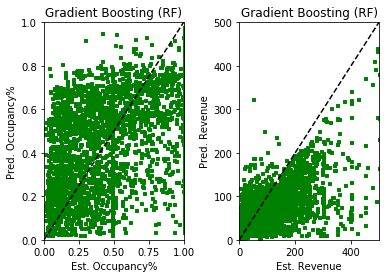

In [387]:
%%time
f, axs = plt.subplots(1, 2)

axs[0].plot(y_test, y_pred_rf, 'gs', markersize=3)
axs[0].set(xlim=(0, 1), ylim=(0, 1), xlabel='Est. Occupancy%', ylabel='Pred. Occupancy%', title= 'Gradient Boosting (RF)')
axs[0].plot([0, 1000], [0, 1000], 'k--')

axs[1].plot(x_test['price']*y_test, x_test['price']*y_pred_rf, 'gs', markersize=3)
axs[1].set(xlim=(0, 500), ylim=(0, 500), xlabel='Est. Revenue', ylabel='Pred. Revenue', title= 'Gradient Boosting (RF)')
axs[1].plot([0, 500], [0, 500], 'k--')
f.subplots_adjust(wspace=0.4);

print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R^2 =', r2_score(y_test, y_pred_rf))
print('RMSE =', np.sqrt(mean_squared_error(x_test['price']*y_test, x_test['price']*y_pred_rf)))
print('R^2 =',r2_score(x_test['price']*y_test, x_test['price']*y_pred_rf))

original price is $ 45.0
original monthly revenue is $ 783.7500000000001
model predicted monthly revenue is $ 974.6680834206554
optimal monthly revenue is $ 1193.2062963417643
optimized price is $ 55


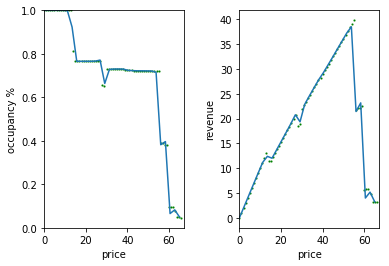

In [305]:
test_ID = 1428
if x_test['price'].iloc[test_ID] > 0:
    max_price = int(x_test['price'].iloc[test_ID]*1.5)
else:
    max_price = 500

price_range = range(0, max_price, 1)

x_in = pd.DataFrame(np.repeat(x_test.iloc[[test_ID]].values, max_price, axis=0))
x_in.columns = x_test.columns
x_in['price'] = pd.DataFrame(list(price_range)).iloc[:, 0]

pred_occupancy = rf.predict(x_in)
pred_occupancy[pred_occupancy < 0] = 0 # ensure that occupancy% does not go below 0%
pred_revenue = pred_occupancy*x_in['price']

xnew1 = np.linspace(0, max_price-2, 30)
spl1 = make_interp_spline(price_range, pred_revenue, k=3)  #BSpline object
power_smooth1 = spl1(xnew1)

xnew2 = np.linspace(0, max_price-2, 30)
spl2 = make_interp_spline(price_range, pred_occupancy, k=3)  #BSpline object
power_smooth2 = spl2(xnew2)

print('original price is $', x_test['price'].iloc[test_ID])
print('original monthly revenue is $', x_test['price'].iloc[test_ID]*y_test.iloc[test_ID]*30)
print('model predicted monthly revenue is $', x_test['price'].iloc[test_ID]*y_pred_rf[test_ID]*30)
print('optimal monthly revenue is $', pred_revenue.max()*30)
print('optimized price is $', np.argmax(pred_revenue))

f,axs=plt.subplots(1,2)

axs[0].plot(price_range, pred_occupancy, 'gs', markersize = 1);
axs[0].plot(xnew2,power_smooth2)
axs[0].set(xlim = (0, max_price), ylim = (0,1) , xlabel = 'price', ylabel = 'occupancy %');

axs[1].plot(price_range, pred_revenue, 'gs', markersize = 1);
axs[1].plot(xnew1,power_smooth1)
axs[1].set(xlim = (0, max_price), xlabel = 'price', ylabel = 'revenue');

f.subplots_adjust(wspace=0.4);